<a href="https://colab.research.google.com/github/nawazsaj/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -<font color="darkred"> Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type    -**<font color="darkorange">Unsupervised
##### **Contribution    -**<font color="darkorange"> Individual
##### **NAME   -**  <font color="omagenda">     S Nawaz

# **Project Summary -**

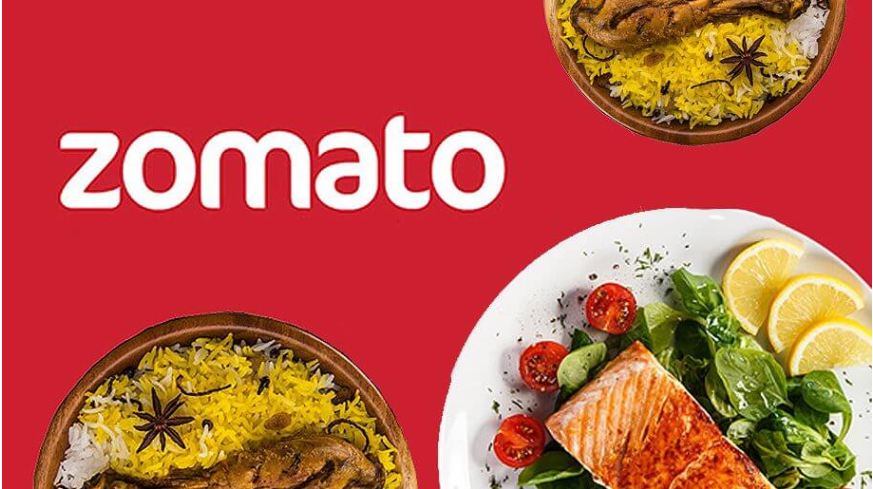.

*  The project aims to analyze the restaurant data from Zomato, an Indian restaurant aggregator and food delivery start-up. The data includes information, menus, and user-reviews of restaurants, as well as food delivery options. By analyzing this data, the project seeks to gain insights into the Indian food industry in each city, with a focus on customers and the company itself.
*  The goal of this project is to analyze data from 105 Zomato restaurants in Hyderabad in order to cluster them into different segments that can be used to help customers find the best restaurant in their area and for the company to improve in areas where they may be lacking. We used two different models for our analysis: a clustering model using K Means and Agglomerative Hierarchical Clustering algorithms, and a sentiment analysis model using various classification algorithms such as Decision Tree, Random Forest, K-Nearest Neighbors, SVM, Logistic Regression, XGboost, Multinomial Naive Bayes, and Light Gradient Boosting Machines.

*  The data was provided to us in two datasets, one containing the names of the restaurants and the other containing their reviews. We used different methods to deal with missing values and manipulated columns to prepare the data for analysis. After performing exploratory data analysis and necessary feature engineering, we used NLP techniques for textual data preprocessing for the sentiment analysis model.

*  For clustering, we used K Means and Agglomerative Hierarchical Clustering algorithms to group the Zomato restaurants into different segments. We also built a sentiment analysis model to classify reviews as positive or negative and used word clouds to visualize the most frequent words in each category. Finally, we built several classification models and selected the best one based on evaluation metrics.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.**

**India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.**

**The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.**

**This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis**

**Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Pandas for data manipulation and analysis
# Import NumPy for numerical computations
# Import Matplotlib for basic data visualization
# Import Seaborn for advanced statistical visualizations
# Import the datetime module for working with dates and times
# Scikit-learn (Sklearn) library is the most useful and robust library for machine learning in python.it provides a selection of efficient tools for machine learning and statistical modeling
# including classification, regression,clustering and dimensionality reduction via a consistence interface in python
# Import warnings module to ignore potential warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from matplotlib import rcParams
from wordcloud import WordCloud
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing kmeans
from sklearn.cluster import KMeans

#Non-negative matrix Factorization
from sklearn.decomposition import NMF

#principal component analysis
from sklearn.decomposition import PCA

#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize

# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset
# mounting the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# The 'pd.read_csv()' function reads the CSV file and returns a Pandas DataFrame.
## Creating path for the dataset
restarent_df = pd.read_csv("/content/drive/MyDrive/data set/Zomato Restaurant names and Metadata.csv")
review_df = pd.read_csv("/content/drive/MyDrive/data set/Zomato Restaurant reviews.csv")

### Dataset First View

In [ ]:
# Dataset First Look
restarent_df.head()


In [ ]:
review_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Total number of rows and columns in restarant_df are: {restarent_df.shape}')
print(f'total number of rows and columns in review_df are:{review_df.shape}')

### Dataset Information

In [ ]:
# Dataset Info
# .info gives the basic information of the data
restarent_df.info()


In [ ]:
review_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
          # checking the duplicated values in the data set
restarent_df.duplicated().sum()

In [ ]:
     #checking the duplicated values in the review data set
review_df.duplicated().sum()

In [ ]:
review_df[review_df.duplicated()]

In [ ]:
review_df.drop_duplicates(inplace=True)

In [ ]:
review_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
         #checking the missing values in the data set
restarent_df.isnull().sum()


In [ ]:
# Visualizing the missing values
# Create a heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(restarent_df.isnull(), cmap='viridis', annot=False)
plt.title('Null Values Heatmap')
plt.show()

In [ ]:
# Missing Values/Null Values Count
         #checking the missing values in the review data set
review_df.isnull().sum()

In [ ]:
# Visualizing the missing value
null_counts= review_df.isnull().sum()
null_counts.plot.bar()
plt.title('Null Value Counts')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()


### What did you know about your dataset?

**Restaurant DataSet**

*   There are 105 total observation with 6 different features.
*   Feature like collection and timing has null values.
*   There is no duplicate values i.e., 105 unique data.
*   Feature cost represent amount but has object data type because these values are separated by comma ','.
*   Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**



*   There are total 10000 observation and 7 features.
*   Except picture and restaurant feature all others have null values.
*   There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
*  we have removed the duplicated values in the review data set

*    Timing represent the time when review was posted but show object data time, it should be converted into date time.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
restarent_df.columns

In [ ]:
# Dataset Columns
review_df.columns

In [ ]:
# Dataset Describe
restarent_df.describe()

In [ ]:
review_df.describe(include = 'all')                  # describing the review data set

### Variables Description

**Restaurant Metadata :**

Name : Name of Restaurants  listed in the dataset.


Links : Each restaurant in the dataset is associated with a URL that provides more information about the restaurant.

Cost : The price range of restaurants varies from INR 150 to INR 2,800.

Collection :The restaurants are categorized into different collections, such as Food Hygiene Rated Restaurants, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings, etc.


Cuisines : The dataset includes a variety of cuisines, including Chinese, Continental, Kebab, European, South Indian, North Indian, Biryani, Seafood, Mediterranean, Desserts, Healthy Food, Lebanese, Ice Cream, Fast Food, Street Food, American, Andhra, Italian, Mexican, Mughlai, Bakery, Japanese, etc.


Timings : The restaurants have different operating hours, ranging from early morning to late night. The opening and closing times vary between establishments.

**Restaurant Reviews :**

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable for restaurant
for i in restarent_df.columns.tolist():
  print("No. of unique values in ",i,"is",restarent_df[i].nunique())

In [ ]:
for column in restarent_df.columns:
    unique_values = restarent_df[column].unique()
    print(f"The unique values of {column} are: {unique_values}")

In [ ]:
# Check Unique Values for each variable for restaurant
for i in review_df.columns.tolist():
  print("No. of unique values in ",i,"is",review_df[i].nunique())

In [ ]:
for column in review_df.columns:
    unique_values = review_df[column].unique()
    print(f"The unique values of {column} are: {unique_values}")

In [ ]:
rest_df = restarent_df.copy()     #copying the data frame
revw_df = review_df.copy()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Checking unique values of cost
rest_df['Cost'].unique()

In [ ]:

# changing the data type of the cost function
rest_df['Cost'] = rest_df['Cost'].str.replace(",","").astype('int64')

In [ ]:
#top 5 costlier restaurant
rest_df.nlargest(5, 'Cost')[['Name', 'Cost']]

In [ ]:
# storing all the cusines
cuisine_value_list = rest_df['Cuisines'].str.split(', ').apply(lambda x: [cuisine.strip() for cuisine in x])


In [ ]:
from collections import Counter

# converting the dict to a data frame
cuisine_counter = Counter([cuisine for cuisine_names in cuisine_value_list for cuisine in cuisine_names])
cuisine_df = pd.DataFrame.from_dict(cuisine_counter, orient='index', columns=['Number of Restaurants']).reset_index().rename(columns={'index': 'Cuisine'})
top_5_cuisines = cuisine_df.sort_values('Number of Restaurants', ascending=False).head(5)

In [ ]:
print(cuisine_counter)

In [ ]:
print(top_5_cuisines)

In [ ]:
# spliting the cusines and storing in list
Collections_value_list = rest_df['Collections'].dropna().apply(lambda x: [collection.strip() for collection in x.split(', ')])
print(Collections_value_list)

In [ ]:
# converting the dict to a data frame
collections_counter = Counter(collection for collections in Collections_value_list for collection in collections)
Collections_df = pd.DataFrame.from_dict(collections_counter, orient='index', columns=['Number of Restaurants']).reset_index().rename(columns={'index': 'Tags'})

#top 5 collection
Collections_df.nlargest(5,'Number of Restaurants')

**Reviews data :**

In [ ]:
# to change data type for rating checking values
revw_df.Rating.value_counts()

In [ ]:
#There is on rating value with string format
revw_df[(revw_df['Rating']=='Like')].head()

In [ ]:
# converting it to 0 since no rating is 0 then to mean
revw_df.loc[revw_df['Rating'] == 'Like'] = 4

#changing data type for rating in review data
revw_df['Rating']= revw_df['Rating'].astype('float64')

In [ ]:
#changing date and extracting few feature for manipulation
revw_df['Reviewer_Total_Review'],revw_df['Reviewer_Followers']=revw_df['Metadata'].str.split(',').str
revw_df['Reviewer_Total_Review'] = pd.to_numeric(revw_df['Reviewer_Total_Review'].str.split(' ').str[0])
revw_df['Reviewer_Followers'] = pd.to_numeric(revw_df['Reviewer_Followers'].str.split(' ').str[1])
revw_df['Time']=pd.to_datetime(revw_df['Time'])
revw_df['Review_Year'] = pd.DatetimeIndex(revw_df['Time']).year
revw_df['Review_Month'] = pd.DatetimeIndex(revw_df['Time']).month
revw_df['Review_Hour'] = pd.DatetimeIndex(revw_df['Time']).hour

In [ ]:
revw_df.head()

In [ ]:
#Average rate of prefered restaurants
avg_hotel_rating = revw_df.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

In [ ]:
#top 5 most prefered or rated restaurant
avg_hotel_rating.nlargest(5,'Rating')

In [ ]:
#top 5 lowest rated restaurant
avg_hotel_rating.nsmallest(5,'Rating')

In [ ]:
#merging both data frames
rest_df = rest_df.rename(columns = {'Name':'Restaurant'})
merged_df = rest_df.merge(revw_df, on = 'Restaurant')
merged_df.shape

In [ ]:
#Price point of restaurants
price_point = merged_df.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [ ]:
#price point for high rated restaurants
price_point.nlargest(5,'Rating')

### What all manipulations have you done and insights you found?

*  Firstly, I started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

*  Restaurant data : In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli has maximum price of 2800 and then found the lowest which is Amul with price of 150.North indian cuisine with great buffet tags is mostly used in hotels.

*  Review data : first we check the rating and then we change the rating data type column as float64.then we created a columns as 'Reviewer_Total_Review','Reviewer_Followers'from Metadata	column.then we check the top rated restarant.



*  Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

*  In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
          #distribution of estimated cost of dining
sns.distplot(x=rest_df['Cost'],color='lime')
plt.xlabel('Estimated Cost of dining',size=8)
plt.title('Distribution Estimated Cost of dining',size=10)
plt.show()

##### 1. Why did you pick the specific chart?

* DISTRIBUTION PLOT :

Cost is a numerical feature, and we utilised a distribution plot to see how the cost of dining varied across all restaurants.

##### 2. What is/are the insight(s) found from the chart?

* From the distribution curve it can be observed that most of restaurants have cost of dinning in the ranging from Rs.150 - Rs.1000 and the median cost is around Rs.700
and the highest cost is 2800

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes. This finding regarding the cost distribution can be useful in grouping clients based on their dining costs.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
price_of_restaurants = rest_df.sort_values('Cost', ascending = False)[['Restaurant','Cost']]
sns.barplot(data = price_of_restaurants[:10], x = "Cost", y='Restaurant',ax=ax1, palette = 'cool')
ax1.set_xlabel('Cost')
ax1.set_ylabel('Restaurant Name')
ax1.set_title('Top 10 Restaurants (Cost-wise)')

sns.barplot(data = price_of_restaurants[-10:], x = "Cost", y='Restaurant',ax=ax2, palette = 'bright')
ax2.set_xlabel('Cost')
ax2.set_ylabel('Restaurant Name')
ax2.set_title('Lowest 10 Restaurants (Cost-wise)')
# Adjust the spacing between subplots
fig.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* Barplot helps to compare the values one with other
* It allow us to compare different set of data among different groups easily

##### 2. What is/are the insight(s) found from the chart?

* I found the top most prefered restaurants with cost wise
* we can say that collage-Hyatt Hyderabad Gachibowli and Feast-Shearton Hyderabad Hotel has high cost

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes from the above chart a customer can identify best suited restaurant for them based on the budget. Also the restaurant owners can assess their standings in the market and reconsider thier price point with respect to their competitors.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
# Get the corresponding cuisine names for the top 5 cuisines
labels = cuisine_df.sort_values('Number of Restaurants', ascending=False)['Cuisine'].head(5).tolist()

# Get the corresponding number of restaurants for the top 5 cuisines
top_5_cuisines = cuisine_df.sort_values('Number of Restaurants', ascending=False)['Number of Restaurants'].head(5).tolist()

# Define a color palette for the pie chart
colors = sns.color_palette('Paired')[4:9]

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart on the first subplot
ax1.pie(top_5_cuisines, labels=labels, colors=colors, autopct='%.0f%%', startangle=90, shadow=True)
ax1.set_title('Top 5 Most Selling Cuisines')

# Generate word cloud text
text = " ".join(name for name in cuisine_df.Cuisine)

# Create the word cloud on the second subplot
word_cloud = WordCloud(width=800, height=800, collocations=False, colormap='rainbow',
                       background_color='black').generate(text)
ax2.imshow(word_cloud, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Cuisine Word Cloud')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart helps to displaying the different values of a given variables.  and word cloud imshow plot to represent textual data in a visually appealing and informative manner

##### 2. What is/are the insight(s) found from the chart?

North indian and chinese cuisines are high selling food followed by continental,biryani,fast food

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* Yes the gained insights help creating a positive business impact
* The word cloud visualization prominently displays North Indian, Chinese, and Continental cuisines as the most prevalent and frequently offered options among various restaurants. Their larger appearance in the word cloud indicates their higher representation in the data

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
# Create a count plot for the ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=revw_df, x='Rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Count of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

Count plot helps to find the count of dfferent kind of ratings

##### 2. What is/are the insight(s) found from the chart?


* we can observe the most rating values given by reviewers

* Most of the people given 4 and 5 ratings it help creating a positive business impact

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* As we can see there are a lot of restaurants with ratings 1 to 3 that need to be improved overall specifically restaurants with 1 rating.

* Take this rating to improve the restaurant.


#### Chart - 5

In [ ]:
# Chart - 5 visualization code
fig = plt.figure(figsize=[10,6])
sns.boxplot(x=merged_df.Rating, y=merged_df.Cost)
plt.title("Distribution of Restaurants based on their cost and ratings")
plt.xlabel("Rating")
plt.ylabel("Cost")
plt.show()

##### 1. Why did you pick the specific chart?

*  We used boxplot here as we wanted to know the spread of costs of the restaurants across the different rated restaurants. Boxplot is used here to know the statistical distribution including median and the different quartiles of the data.

##### 2. What is/are the insight(s) found from the chart?

From the bivariate analysis of the Ratings and Cost columns we got to know that people do not prefer costly restaurants.

* Some of the costly restaurants have very less ratings and some of them do have a good rating.

* The average cost of all type of rated restaurants are almost close to each other

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see, there isn't a lot of information available on costly restaurants. Most likely because many individuals want to pay less, but we can also see that the Rating 5.0 box is the most vertically elongated, implying that many do not dine in expensive places. They don't go there very often, but the few times they do, they're satisfied.



#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

In [ ]:
#visualization code for price point of low rated restaurant
sns.barplot(data = most_engaged_hotel[-10:-1], x = 'Price_Point',
            y = 'Restaurant')
plt.title('Price Point for Low Rated Restaurant', size = 15)
plt.show()

##### 1. Why did you pick the specific chart?

* barplot helps compare the Top rated and low rated restaurants reviwe given by reviwers

##### 2. What is/are the insight(s) found from the chart?

* Cascade-Radisson Hyderabad Hitec city,Zega-Sheraton Hyderabad Hotel, B-Dubs, and Absolute Brbecue are top-priced given by reviewers

* Asian Meal Box, Pakwaan Grand, and Desi Bytes are low-priced

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes the gained insights help creating a positive business impac,Based on the analysis above any restaurant owner can determine the gaps between their price point and the average ratings they receive, based on that they can come to conclusion whether they need to level up the services they provide or they need to reconsider their price point to maintain their position in the market or to perform better than earlier.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
revw_df['Review_Hour'] = revw_df['Review_Hour']

# Create a count plot to visualize the number of reviews by review hour
plt.figure(figsize=(10, 6))
sns.countplot(data=revw_df, x='Review_Hour', color='blue')
plt.xlabel('Review Hour')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Review Hour')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps to compare the review hours

##### 2. What is/are the insight(s) found from the chart?

Most review given period is afternoon and night time hours, As we can conclude that review hours as lunch and dinner time

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes the gained insights help create a positive business impact

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# Convert the 'Review_Year' and 'Review_Month' columns to integers
revw_df['Review_Year'] = revw_df['Review_Year']
revw_df['Review_Month'] = revw_df['Review_Month']

# Combine 'Review_Year' and 'Review_Month' columns to create a new 'Year_Month' column
revw_df['Year_Month'] = revw_df['Review_Year'].astype(str) + '-' + revw_df['Review_Month'].astype(str)

# Create a count plot to visualize the number of reviews by review month and year
plt.figure(figsize=(12, 6))
sns.countplot(data=revw_df, x='Year_Month', color='skyblue')
plt.xlabel('Review Year-Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Review Year-Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps to compare the review hours

##### 2. What is/are the insight(s) found from the chart?

Most review given time period is afternoon and night time hours

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes the gained insights help creating a positive business impact

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Review_Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged_df[col], color = '#055E85', fit = norm);
    feature = merged_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    #plt.legend(bbox_to_anchor = (1.0, 1), loc = 'up')
    plt.title(f'{col.title()}');
plt.tight_layout();
plt.show()

##### 1. Why did you pick the specific chart?

* Distplot is used to create a histogram with mean and median of Cost ,Rating and Review Year

##### 2. What is/are the insight(s) found from the chart?


* Cost and review year indicates that the data is positively skewed. In a positively skewed distribution, the tail of the distribution extends towards the higher values, pulling the mean in that direction and resulting in a mean value that is greater than the median.

* Rating indicates that the data is negatively skewed. In a negatively skewed distribution, the tail of the distribution extends towards the lower values, pulling the mean in that direction and resulting in a mean value that is less than the median.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Price always place important role in any business alongwith rating which show how much engagement are made for the product.

* But in this chart it is unable to figure any impact on business when plotted all alone.

#### Chart - 10

In [ ]:
# Converting Object type variable into a datetime object
revw_df['Time'] = pd.to_datetime(revw_df['Time'],format="%m/%d/%Y %H:%M")

# Create three new columns named day from Time

revw_df['day']= revw_df['Time'].dt.day_name()

In [ ]:
# Number of reviews posted on days of week
day_wise_review = revw_df['day'].value_counts().reset_index().rename(columns = {'index': 'day','day':'review count'})


In [ ]:
# Chart - 10 visualization code
fig, (ax1, ax2,) = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x= revw_df['day'],ax=ax1, palette = 'Paired')
ax1.set_xlabel('DAYS')
ax1.set_title('Review based on day')
# review based on months
sns.countplot(x=revw_df['Review_Month'],ax=ax2, palette = 'Accent' )
ax2.set_xlabel('months')
ax2.set_title('Review based on months')
fig.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* Count plot helps to find the count of dfferent kind of ratings

##### 2. What is/are the insight(s) found from the chart?

* Most of the reviews are posted on Weekends.

* Customers are mostly free on weekends, so rolling out offers on these days can attract more people.
* May recorded as highest review count

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 - Correlation Heatmap

In [ ]:
# Chart - 11 visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(merged_df.corr(),ax = ax, annot=True, cmap = 'viridis', linewidths = 1)

plt.show()

##### 1. Why did you pick the specific chart?

*  Heatmaps are used to visually represent data in a matrix form where each cell's color is determined by its value.
*  Heatmaps are commonly used in data visualization to represent patterns or relationships in data, and to identify areas of high and low values or activity.
*  Heatmap consists of small square boxes having a numeric value known as correlation coefficient.
*  A correlation coefficient is a statistical measure that indicates the strength and direction of a linear relationship between two variables.
*  A correlation coefficient of 0 indicates no linear relationship between the two variables, while a correlation coefficient of 1 indicates a perfect positive linear relationship

##### 2. What is/are the insight(s) found from the chart?

* few features are correlated, like reviewer total review is related to reviewer follower and again reviewer total review is related to pictures.it is clear that all other variables are not that correlated

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


#### Chart - 12 - Pair Plot

In [ ]:
# Chart - 12 visualization code

# Pair Plot visualization code
sns.pairplot(data=merged_df)


##### 1. Why did you pick the specific chart?

*  A pair plot graph is used for analyzing, it helps explore relationships, detect patterns and trends, and identify outliers.
*  It allows for correlation analysis and understanding of data distributions.
* The visualization of time series data is facilitated, aiding in the identification of long-term trends.
* Pair plots are visually appealing and effective for communicating findings to stakeholders. They can generate hypotheses and compare variables with other relevant factors.
*  Pair plots support exploratory data analysis, serving as a starting point for further analysis.

##### 2. What is/are the insight(s) found from the chart?

* A pair plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis.
* We can see there is no significant correlation between the given features in the merged_df.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis_1:The cost of a restaurant is positively correlated with the rating it receives.**

**Hypothesis_2:Restaurants that are reviewed by reviewers with more followers will have a higher rating.**

**Hypothesis_3:Restaurants that offer a wider variety of cuisines will have a higher rating.**

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)

2. Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)

3. Test : Simple Linear Regression Analysis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# Check for missing values in the relevant columns
if 'Rating' not in merged_df.columns or 'Cost' not in merged_df.columns:
    raise ValueError("The 'Rating' and 'Cost' columns are required in the 'merged_df' DataFrame.")

# Drop rows with missing values in 'Rating' or 'Cost' (if necessary)
merged_df.dropna(subset=['Rating', 'Cost'], inplace=True)

# Fit the linear model
model = smf.ols(formula='Rating ~ Cost', data=merged_df).fit()

# Check p-value of the coefficient for 'Cost'
p_value = model.pvalues[1]

# Set the significance level (alpha)
alpha = 0.05

# Check if p-value is less than the significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant relationship between the cost of a restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis: There is no significant relationship between the cost of a restaurant and the rating it receives.")

##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating

##### Why did you choose the specific statistical test?

* For testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable.

* Based on the p-value obtained from the regression analysis, we will make a decision to either reject or fail to reject the null hypothesis. If we reject the null hypothesis, we can conclude that there is a statistically significant positive relationship between the cost of a restaurant and the rating it receives. If we fail to reject the null hypothesis, we do not have enough evidence to suggest that the cost has a significant impact on the rating

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)

Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)

Test : Sperman correlation Tes

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Perform the Spearman Rank Correlation test
correlation, p_value = stats.spearmanr(merged_df['Rating'], merged_df['Reviewer_Followers'])

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value with alpha
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant relationship between 'Rating' and 'Reviewer_Followers'.")
else:
    print("Fail to reject Null Hypothesis: There is no significant relationship between 'Rating' and 'Reviewer_Followers'.")

##### Which statistical test have you done to obtain P-Value?

I have used sperman correlation test

##### Why did you choose the specific statistical test?

Since we have an idea that these two doesn't look linearly correlated, so spearman correlation helps us to see whether the two variables covary; whether, as one variable increases, the other variable tends to increase or decrease.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)

Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)

Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

# Make sure 'merged' DataFrame contains 'Cuisines' and 'Rating' columns

# Check for missing values in the relevant columns
if 'Cuisines' not in merged_df.columns or 'Rating' not in merged_df.columns:
    raise ValueError("The 'Cuisines' and 'Rating' columns are required in the 'merged' DataFrame.")

# Drop rows with missing values in 'Cuisines' or 'Rating' (if necessary)
merged_df.dropna(subset=['Cuisines', 'Rating'], inplace=True)

# Create a contingency table
ct = pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
significance_level = 0.05
if p < significance_level:
    print("Reject Null Hypothesis: There is a significant relationship between 'Cuisines' and 'Rating'.")
else:
    print("Fail to reject Null Hypothesis: There is no significant relationship between 'Cuisines' and 'Rating'.")


##### Which statistical test have you done to obtain P-Value?

* I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

* It is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#Checking null values
rest_df.isnull().sum()

In [ ]:
rest_df[rest_df['Timings'].isnull()]

In [ ]:
rest_df.fillna(rest_df.Timings.mode()[0], inplace = True)

In [ ]:

#dropping collection column since has more than 50% of null values
rest_df.drop('Collections', axis = 1, inplace = True)

In [ ]:
rest_df.isnull().sum()

In [ ]:
revw_df.isnull().sum()                  #review missing value

In [ ]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
revw_df = revw_df.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [ ]:
#again checking the remaining values
null_counts = [(x, a) for x, a in revw_df.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counts

In [ ]:
#filling null values in review and reviewer follower column
revw_df = revw_df.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [ ]:
revw_df.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

* I have checked the null values for restaurant data set and fill null values with mode for collection and timing columns and check the duplicate values for review dataset and drop the duplicate values as well as null values for reviewer and reviewer total review columns

In [ ]:
#merging both dataset
merg_df = rest_df.merge(revw_df, on = 'Restaurant')
merg_df.shape

In [ ]:
merg_df.isnull().sum()

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Select numerical columns only (excluding non-numeric columns)
numerical_columns = merg_df.select_dtypes(include=['float64', 'int64'])

# Loop through each numerical column and create a box plot to visualize outliers
for column in numerical_columns:
    plt.figure()
    sns.boxplot(x=merg_df[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column} (with Outliers)')
    plt.show()


In [ ]:
for i in numerical_columns:
    #plt.subplot(10, 4, 2)
    plt.xlabel('Distribution of {}'.format(i))

    # Calculate the IQR for the column
    Q1 = merg_df[i].quantile(0.25)
    Q3 = merg_df[i].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    filtered_data = merg_df[(merged_df[i] >= lower_bound) & (merg_df[i] <= upper_bound)]

    # Plot the boxplot without outliers
    sns.boxplot(x=i, data=filtered_data, color="tomato")

    #c += 1

    plt.tight_layout()
    plt.show()

In [ ]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
rest_df[(rest_df['Cost'] >= lower_bound) & (rest_df['Cost'] <= upper_bound)]

In [ ]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
revw_df[(revw_df['Reviewer_Followers']>= lower_bound) & (revw_df['Reviewer_Followers'] <= upper_bound)]

##### What all outlier treatment techniques have you used and why did you use those techniques?

* The Interquartile Range (IQR) is a measure of statistical dispersion that represents the range of the middle 50% of the data in a dataset. It is used to summarize the spread or variability of a dataset, especially in the presence of outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Encode your categorical columns

# getting only necessary features for Clustering
cluster_df = pd.merge(rest_df, price_point, how='right',
                      on='Restaurant')[['Restaurant', 'Cost', 'Rating', 'Cuisines']]

# Encoding the Cuisines as columns to further use in clustering

#splitting cuisines into a list
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x: x.split(', '))

# adding the number of cuisines another feature
cluster_df['no_of_cuisines'] = cluster_df['Cuisines'].apply(lambda x: len(x))


# Create a list of all unique cuisines
all_cuisines = list(set([cuisine for cuisines in cluster_df['Cuisines'] for cuisine in cuisines]))

# Create a DataFrame with a column for each unique cuisine
cuisine_df = pd.DataFrame(columns=all_cuisines)

# Loop over each restaurant and create a feature vector
for i, row in cluster_df.iterrows():
    feature_vec = {cuisine: 0 for cuisine in all_cuisines}
    for cuisine in row['Cuisines']:
        feature_vec[cuisine] += 1
    cuisine_df.loc[i] = feature_vec

# Concatenate the original DataFrame with the cuisine DataFrame
cluster_df = pd.concat([cluster_df, cuisine_df], axis=1)

In [ ]:
cluster_org_df = cluster_df.copy()

In [ ]:
cluster_df.head()

#### What all categorical encoding techniques have you used & why did you use those techniques?

* Here I used technique similar to One Hot Encoding or count vectorization, I have converted cuisines as features and their counts in the values for each restaurants to execute unsupervised clustering in the data

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
!pip install contractions

In [ ]:
#creating new df for text processing of sentiment analysis
sentiment_df = revw_df[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

In [ ]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [ ]:
sentiment_df.sample(2)

In [ ]:
import contractions

# Assuming sentiment_df is your DataFrame with 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: contractions.fix(x))

# Print the updated DataFrame to see the changes
print(sentiment_df)

#### 2. Lower Casing

In [ ]:
# Lower Casing
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

sentiment_df.head()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [ ]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
rest_df['Location'] = rest_df['Links'].apply(get_location)
rest_df.sample(2)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [ ]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [ ]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [ ]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [ ]:
#random sample
sentiment_df.sample(2)

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

sentiment_df.sample(2)

##### Which text normalization technique have you used and why?

* i have used Lemmatization as a text normalization technique.

* Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

##### Which text vectorization technique have you used and why?

* I have used Tf-idf Vectorization technique.

* TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#columns for dataset
rest_df.columns

In [ ]:
#dropping columns
resta_df = rest_df.drop(columns = ['Links','Location'], axis = 1)

In [ ]:
#dropping cuisine and restaurant from cluster_df
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

In [ ]:
#review column
revw_df.columns

In [ ]:
#For sentiment analysis
# Create a new column for sentiment based on the ratings
def classify_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating >= 3:
        return 'Neutral'
    else:
        return 'Negative'

sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(classify_sentiment)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
sentiment_df.head()

In [ ]:

# From analysis df, keeping only required features for final input
sentiment_df = sentiment_df[['Restaurant', 'Review', 'Rating', 'Sentiment']]

##### What all feature selection methods have you used  and why?

* We are going to use Principal Component Analysis (PCA) for feature selection, in the Clustering problems we have to deal with dimensionalty problem with features.

##### Which all features you found important and why?

* for the Restaurant Clustering, we find that 'Cuisines', 'Cost', 'Rating' as important feature to perform clustering. and for the Topic modeling from Reviews data, we have selected reviews text data and converted that to tfidf vectors.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
cluster_df['Cost'] = np.log(cluster_df['Cost']) # tranfomed Cost

* transforming features, such as log transforming right-skewed data, is done to improve the performance and interpretability of machine learning models, particularly when dealing with skewed or non-normal data. moreover other numerical features does follow symmetric distribution of data.

### 6. Data Scaling

In [ ]:
# Scaling your data

# Select the numerical variables to standardize
numerical_vars = ['Cost', 'Rating', 'no_of_cuisines']

# Standardize the numerical variables using StandardScaler
scaler = StandardScaler()
cluster_df[numerical_vars] = scaler.fit_transform(cluster_df[numerical_vars])

##### Which method have you used to scale you data and why?

* I've used Standard Scaler, these variables have different scales and ranges, which can affect the results of clustering. For example, the cost of a meal can be a much larger number than the rating, and this can cause the clustering algorithm to give more weight to the cost variable in the clustering process.

* By standardizing the numerical variables, we put them on the same scale and range, which ensures that each variable contributes equally to the clustering process. This makes the clustering results more reliable and interpretable.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* Dimensionality reduction is the process of reducing the number of features in a dataset while preserving as much of the relevant information as possible. It is a technique used to overcome the curse of dimensionality, which refers to the problem of increased computational complexity and decreased performance of machine learning models as the number of features increases.

* So that the Dimensionality reduction is needed because the countvectorization technique creates neumerious number of features that are used in clustering and to working with huge amount of features impact our performance and resources.

In [ ]:
# DImensionality Reduction (If needed)

pca = PCA()

# Fit the PCA object to your standardized data
pca.fit(cluster_df)

# Get explained variance ratio of each principal component
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# visualising the cummulative variance
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(cumulative_var, marker='o', color='purple')
ax.set_xlabel("Number of Components")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title("Cumulative Explained Variance vs Number of Components")
plt.xlim([0, 15])


plt.show()


In [ ]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(cluster_df)

# transform data to principal component space
pca_df = pca.transform(cluster_df)

# variance explained by three components
print(f'Cumulative variance explained by 3 principal components: {np.sum(pca.explained_variance_ratio_)}')

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

* We used Principal Component Analysis technique. PCA is a commonly used unsupervised technique for reducing the dimensionality of high-dimensional datasets while retaining most of the variation present in the original data.

* PCA is a suitable technique in this case because you have more than 40 features, and using all of them for clustering may result in a high-dimensional space that can make it challenging to visualize and analyze the data. PCA reduces the dimensionality of the data by transforming the original features into a new set of orthogonal features that represent the most important patterns in the data. These new features, called principal components, are ordered by the amount of variance they explain in the original data.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.


##### What data splitting ratio have you used and why?

Not Required

The train-test split is a technique for evaluating the performance of a machine learning algorithm. primary used for classification or regression problems and can be used for any supervised learning algorithm. Since This is an Unsuopervised ML problem and we dont require an a validation data, we are not going to use this.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

K-Means Clustering is an Unsupervised Learning algorithm.The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

* Determines the best value for K center points or centroids by an iterative process.

* Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

Hence each cluster has datapoints with some commonalities, and it is away from other clusters.

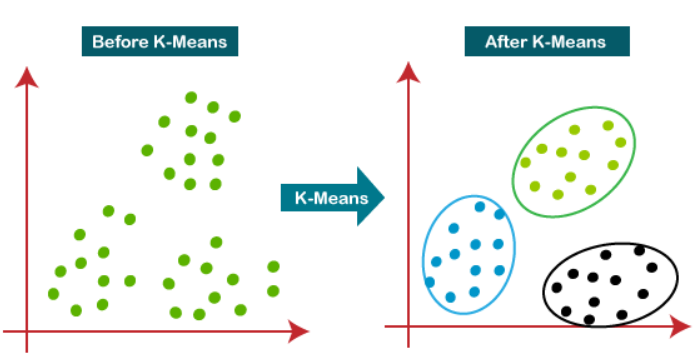

The performance of the K-means clustering algorithm depends upon highly efficient clusters that it forms. But choosing the optimal number of clusters is a big task. There are two most efficient methods to choose optimal number of clusters



**ELBOW METHOD**

This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:

* WCSS= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3 distance(Pi C3)2
In the above formula of WCSS, ∑Pi in Cluster1 distance(Pi C1)2: It is the sum of the square of the distances between each data point and its centroid within a cluster1 and the same for the other two terms. To measure the distance between data points and centroid, we can use any method such as Euclidean distance or Manhattan distance.

**SILHOUETTE METHOD**

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). Select a range of values of k (say 1 to 10). Plot Silhouette coefﬁcient for each value of K.
 The equation for calculating the silhouette coefﬁcient for a particular data point:
 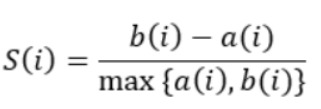


* S(i) is the silhouette coefficient of the data point i.

* a(i) is the average distance between i and all the other data points in the cluster to which i belongs.

* b(i) is the average distance from i to all clusters to which i does not belong.

In [ ]:
# ML Model - 1 Implementation

  #Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(pca_df)
    wcss.append(km.inertia_)

In [ ]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="Green", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

In [ ]:
#silhouette score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_df)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_df[:, 0], pca_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

K-means is a clustering algorithm that is commonly used in machine learning to partition data into groups or clusters based on similarities between data points. It works by grouping data points that are closest to each other in a multi-dimensional space.

k-means clustering was applied to dataset containing information on restaurants including their cuisine, ratings, and cost. The model was used to cluster the restaurants into groups based on these features.

Silhouette score is a metric used to evaluate the quality of clustering results. It measures the distance between each data point in a cluster to the other points in the same cluster compared to the distance between that point and the points in the nearest neighboring cluster. The score ranges from -1 to 1, with values closer to 1 indicating better-defined clusters.

The performance of the model was evaluated using the silhouette score metric, which measures how well-separated the clusters are. The silhouette score for this model was approximately 0.31, which suggests that the clusters are somewhat distinct.

To interpret the silhouette visualizer graph, we should look for the following:

High average silhouette score: The optimal number of clusters will have a high average silhouette score, indicating that the clusters are well-separated and the data points are well-matched to their assigned clusters.

Even cluster sizes: The clusters should have roughly equal numbers of data points, which will be represented by bars of similar width.

No overlapping clusters: There should be no overlapping bars, which would indicate that the clustering is suboptimal.

No negative scores: Negative silhouett

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 4, init= 'k-means++', random_state = 42)
kmeans.fit(pca_df)

#predict the labels of clusters.
label = kmeans.fit_predict(pca_df)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(pca_df[label == i , 0] , pca_df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Assigning clusters to our data
cluster_df['clusters'] = kmeans.labels_
# checking how it is working
cluster_df.head()

In [ ]:
# Counting content in each cluster
cluster_content_count = cluster_df['clusters'].value_counts().reset_index().rename(columns={'index':'clusters','clusters':'observations'}).sort_values(by='observations')
cluster_content_count

In [ ]:
sns.barplot(data=cluster_content_count, x='clusters', y='observations',palette='viridis')
plt.title('Counting content in each cluster')

In [ ]:
import plotly.express as px
fig = px.scatter(cluster_df, y="Cost", x="clusters",color="clusters")
fig.update_traces(marker_size=8)
fig.show()
plt.show()

In [ ]:
fig = px.scatter(cluster_df, y="Rating", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* We applied K means Clustering to cluster the Restaurants based on the given features. We used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 4 was best for our model. Then, using the Cumulative Explained Variance, we performed Principal Component Analysis to reduce the dimension to n components = 2. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the second cluster.

####2. Explain business impact of the ML model used.

K means clustering can be useful in customer segmentation based on demographic, psychographic and behavioural data as well as performance data to cluster the consumers for a particular product category. This can be eventually useful in making business strategies for different categories of customers and retain them for further growth of business.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 - Hierarchial clustering


Hierarchial clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

**Agglomerative hierarchical clustering**
The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets.
This hierarchy of clusters is represented in the form of the dendrogram.


**Dendrogram in Hierarchical clustering**

The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.

The working of the dendrogram can be explained using the below diagram:

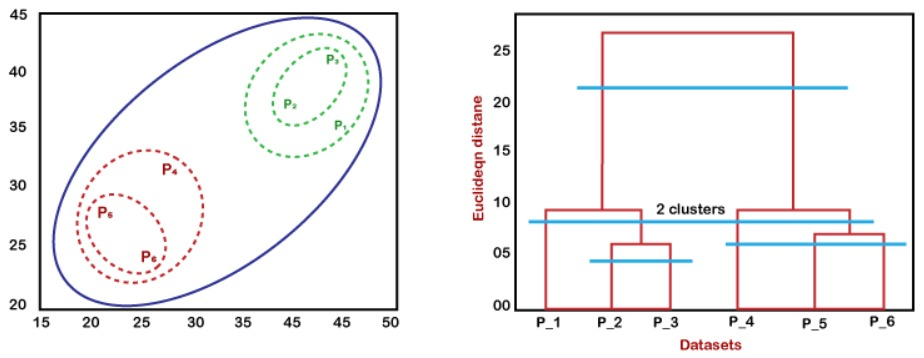

In [ ]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(pca_df, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.grid(False)
plt.show()

####**Aglomerative Clustering**

In [ ]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering
silhouette_scores = []
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(pca_df)
    score = silhouette_score(pca_df, y_hc)
    #print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
    # append the score to the list
    silhouette_scores.append(score)
# plot the silhouette scores against the number of clusters
plt.plot(range_n_clusters,silhouette_scores )
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 4)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(pca_df)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(pca_df[row_ix, 0], pca_df[row_ix, 1])
# show the plot
plt.grid(False)
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(pca_df,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pca_df, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(pca_df, y_hc))

In [ ]:
# Converting the PCA data matrix into a Pandas Dataframe
pca = pd.DataFrame(columns=['pc1', 'pc2', 'pc3'])
pca['pc1'] = pca_df[:,0]
pca['pc2'] = pca_df[:,1]
pca['pc3'] = pca_df[:,2]
pca['labels'] = y_hc

# Create scatter plot with larger and thicker data points
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=pca['pc1'], y=pca['pc2'], c=pca['labels'], s=50, cmap='cool', alpha=0.8)
plt.title('My Clustered Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, loc='best', title='Labels')

plt.show()

In [ ]:
# adding cluster labels to the original restaurants data
cluster_org_df = cluster_org_df[['Restaurant', 'Cost', 'Rating', 'Cuisines']]
cluster_org_df['labels'] = y_hc

####Cluster 1 - Local Street/Fast Food

In [ ]:
cluster_org_df[cluster_org_df['labels']==0]

####Cluster 2 - Premium Continental Restaurants

In [ ]:
cluster_org_df[cluster_org_df['labels']==1]

####Cluster 3 - International Cuisines

In [ ]:
cluster_org_df[cluster_org_df['labels']==2]

####Cluster 4 - Cafe, Ice Creams and Desserts

In [ ]:
cluster_org_df[cluster_org_df['labels']==3]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


* We have used Hierarchical Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a bottom-up approach to cluster the data. We have used Silhouette Coefficient Score and used clusters = 4 and then visualized the clusters and the data points within it

2. Explain the impact of the ML model used.



* Hierarchical Clustering can help an enterprise organize data into groups to identify similarities and, equally important, dissimilar groups and characteristics, so that the business can target pricing, products, services, marketing messages and more.Once the segments are identified, marketing messages and products can be customized for each segment. The better the segments chosen for targeting by a particular organization, the more successful the business will be in the market.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 -Topic Modeling and Sentiment Analysis

**In natural language understanding (NLU) tasks, there is a hierarchy of lenses through which we can extract meaning — from words to sentences to paragraphs to documents. At the document level, one of the most useful ways to understand text is by analyzing its topics. The process of learning, recognizing, and extracting these topics across a collection of documents is called topic modeling.**

**Topic modelling refers to the task of identifying topics that best describes a set of documents. These topics will only emerge during the topic modelling process (therefore called latent). And one popular topic modeling technique is known as Latent Dirichlet Allocation (LDA).**
  

  **Latent Dirichlet Allocation
(LDA) is a generative probabilistic process, designed with the specific goal of uncovering latent topic structure in text corpora.**  

In [ ]:
# ML Model - 3 Implementation

from sklearn.decomposition import LatentDirichletAllocation

# Choose a topic modeling algorithm
lda_model = LatentDirichletAllocation(n_components=4, random_state=5)

# Train the topic model
lda_model.fit(X_tfidf)

In [ ]:

# Assuming you have already defined lda_model and X_tfidf

# Get the feature names from the TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Create subplots for displaying word clouds
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Interpreting the results
for topic_idx, topic in enumerate(lda_model.components_):
    wordcloud = WordCloud(width=400, height=400,
                          background_color='white',
                          stopwords=None,
                          min_font_size=10).generate(" ".join([feature_names[i]
                          for i in topic.argsort()[:-50 - 1:-1]])) # Top 50 words for each Topic

    # plot the WordCloud image
    ax = axs[topic_idx // 2][topic_idx % 2]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title("Topic {}".format(topic_idx))
    ax.axis("off")
    ax.add_artist(plt.Rectangle((-.5, -.5), wordcloud.width + 1,
                                wordcloud.height + 1, fill=False, edgecolor='black', linewidth=2))
    plt.tight_layout(pad=0)

plt.show()

topic modeling is a valuable tool for uncovering the hidden structure within textual data, enabling more efficient analysis and understanding of large document collections.It works by grouping similar words and phrases together to create a set of topics that can be used to summarize the content of the text.

Here is what we can approximatly infer from each Topic.

1. Topic 0: Personal Review Preferences

2. Topic 1: Positive Reviews

3. Topic 2: Reviews based on Service quality

4. Topic 3: Reviews based on Quantity, Delivery etc.

However, when it comes to analyzing reviews data of critics for Zomato restaurants, topic modeling may not be as impactful. This is because critics' reviews are often highly subjective and can vary greatly in terms of language and writing style. This makes it difficult to identify clear and consistent themes or topics across different reviews.

Positive, Negative and Neutral Sentiments of Data


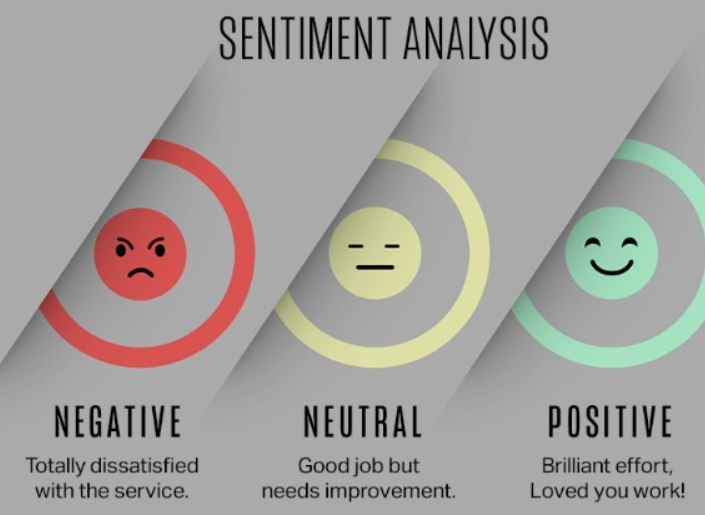

In [ ]:
# Count the number of reviews for each sentiment
sentiment_counts = sentiment_df['Sentiment'].value_counts()

# Create a pie chart to show the proportion of reviews for each sentiment
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sentiment_counts, labels=sentiment_counts.index,
       autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Zomato Restaurant Review Sentiment Proportions')

plt.show()


In [ ]:
### Extracting Negative words from reviews that provide us areas of improvements in Restaurants.

# Create a list of negative words compatible to zomato data
negative_words = ['bad', 'poor', 'terrible', 'horrible', 'awful', 'disgusting', 'unsatisfactory', 'disappointing',
                  'unappetizing', 'bland', 'tasteless', 'stale', 'undercooked', 'overcooked', 'burnt', 'greasy', 'fatty',
                  'soggy', 'unhygienic', 'slow', 'rude', 'unprofessional', 'overpriced']


# Create a dictionary to store the negative words for each restaurant
restaurant_negative_words = {}

for index, row in sentiment_df.iterrows():
    # Get the restaurant name and review text from the row
    restaurant = row['Restaurant']
    review_text_list = row['Review']  # Assuming the 'Review' column contains lists of review texts

    # Convert the list of review texts to a single string
    review_text = " ".join(review_text_list)

    # Tokenize the review text into individual words
    review_words = review_text.split()

    # Find the negative words in the review
    negative_words_in_review = [word.lower() for word in review_words if word.lower() in negative_words]

    # Add the negative words to the list for the corresponding restaurant
    if restaurant in restaurant_negative_words:
        restaurant_negative_words[restaurant].extend(negative_words_in_review)
    else:
        restaurant_negative_words[restaurant] = negative_words_in_review

# Convert the dictionary to a dataframe
df_negative_words = pd.DataFrame(list(restaurant_negative_words.items()), columns=['Restaurant', 'negative_words'])

# merging the average ratings n this data (average rating is previously stored in varible)
negative_df = pd.merge(df_negative_words, price_point, left_on='Restaurant',
                       right_on='Restaurant', how='left')[['Restaurant', 'negative_words', 'Rating']]

#negative_df.head(3)


negative_df.head(3)


In [ ]:
# creating fnction to plot wordcloud

def word_cld_genrator(lists_of_words, title, axis):

    # creating a single word list of all negative words.
    words = []
    for word_list in lists_of_words:
        words.extend(word_list)

    # join the words in the list into a single string
    text = ' '.join(words)

    # generate the word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=10, random_state=5).generate(text)

    # plot the word cloud
    plt.subplot(1, 2, axis)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=3)
    plt.title(title, size=15)

#### :Areas of Improvements for Restaurants


In [ ]:
# getting negative words of 15 lowest rated restaurants into a list
lists_of_words = negative_df.sort_values('Rating').head(15)['negative_words'].tolist()
# all negative words from the reviews data
all_words = negative_df['negative_words'].tolist()

# creating a figure
plt.figure(figsize=(13, 15), facecolor=None)

word_cld_genrator(lists_of_words, 'Negative Words for 15 Lowest Rated Restaurants', 1)
word_cld_genrator(all_words, 'Negative words for all Restaurants', 2)

**Areas of Improvements-**

For Lowest Rated Restaurants:

*  Taste
*  Price
*  Behaviour
*  hygiene

For Overall Restaurants:

*  Behaviour
*  Quality
*  Service Time
*  Experience

In [ ]:
# sentiment_counts = sentiment_df['Sentiment'].value_counts()
# Review and rating column for analysis
senti_df = revw_df[['Review','Rating']]


In [ ]:
senti_df.info()

In [ ]:

#We will create 2 categories based on the rating by creating a python function
def sentiment(rating):
  if rating >=3.5:
    return 1
    # positive statement
  else:
    return 0
    # negative

In [ ]:
senti_df['sentiment']=senti_df['Rating'].apply(lambda x:sentiment(x))
senti_df.head()

In [ ]:
# We will create x and y varibles for independent and dependent variable
X = senti_df['Review']
y = senti_df['sentiment']


#### Train - Test Split:

In [ ]:

# let's split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
##Text Vectorization:
# let's create tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart


#Importing all the required libraries for module
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

In [ ]:
# Let's create class for all models
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
svm = SVC(random_state=6)
lgr = LogisticRegression(solver='liblinear')
mnb =  MultinomialNB()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [ ]:
models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Logistic Regression" : lgr,
          "XGboost" : xgb,
          'Multinomial NB' : mnb,
          'LGBM' : lgbm}


In [ ]:
# Fitting the models
for key, value in models.items():
    model = value
    model.fit(X_train, y_train)

In [ ]:
models_name = [['XGboost', XGBClassifier()],
          ['Decision tree', DecisionTreeClassifier()],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['LGBM', lgb.LGBMClassifier()],
          ['Random forest', RandomForestClassifier(n_estimators=90)],
          ['SVM', SVC(random_state=6)],
          ['Multinomial NB' , MultinomialNB()]
          ]


In [ ]:

#Let's create one dataframe which holds the results of the evaluation metric
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models_name :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

In [ ]:
#let's check once
model_1_data = pd.DataFrame(model_1_data)
# model_1_data.drop('Precision',axis=1,inplace=True)
model_1_data

#### 2. Cross- Validation & Hyperparameter Tuning

#### Logistic Regression:

In [ ]:
# ML Model - Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Let's the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid_lgr = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid_lgr, cv = 5)

logreg_cv.fit(X_train, y_train)

#Let's print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

In [ ]:
# prediction report
logreg_pred = logreg_cv.predict(X_test)
print(classification_report(y_test,logreg_pred,digits=4))

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, logreg_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

 * We have used Grid Search CV Hyperparameter optimization technique and tried to find the best values of C.We got best params 'C': 3.7. We have also used Cross validation with CV = 5

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### XG boost Classifier :

In [ ]:
xgbc = XGBClassifier()


#Let's find the best parameters for XGBRegressor by gridsearchcv
xgb_param = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}

# Instantiating Decision Tree classifier
xgb_cv=GridSearchCV(estimator=xgbc,param_grid=xgb_param,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)

xgb_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

#Finding the best fit
xgb_cv.best_estimator_

In [ ]:
# prediction report
xgb_pred = xgb_cv.predict(X_test)
print(classification_report(y_test,xgb_pred,digits=4))

In [ ]:
# confusion matrix
conf_mat = confusion_matrix(y_test, xgb_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

#### Which hyperparameter optimization technique have you used and why?

We have used Grid Search CV Hyperparameter optimization technique and tried to find the best values of 'n_estimators','max_depth','criterion': ['entropy'].

We got best params combination as {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}. We have also used Cross validation with CV = 3

#### LightGBM

In [ ]:
lgbc = lgb.LGBMClassifier()

from sklearn.model_selection import GridSearchCV

# let's find the best parameters for XGBRegressor by gridsearchcv
lgbm_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}

# Instantiating Decision Tree classifier
lgbm_cv = GridSearchCV(estimator=lgbc ,param_grid=lgbm_para,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)

lgbm_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(lgbm_cv.best_params_))
print("Best score is {}".format(lgbm_cv.best_score_))

#Finding the best fit
lgbm_cv.best_estimator_


In [ ]:
# report
lgbm_pred = lgbm_cv.predict(X_test)
print(classification_report(y_test,lgbm_pred,digits=4))

In [ ]:
# confusion matrix
conf_mat = confusion_matrix(y_test, lgbm_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

#### Which hyperparameter optimization technique have you used and why?

We have used Grid Search CV Hyperparameter optimization technique and tried to find the best values of 'n_estimators','max_depth'.We got best params combination as {'max_depth': 25, 'n_estimators': 100}. We have also used Cross validation with CV = 3

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

*  **We use two different models for our analysis: a clustering model using K Means and Agglomerative Hierarchical Clustering algorithms, and a sentiment analysis model using various classification algorithms such as Decision Tree, Random Forest, K-Nearest Neighbors, SVM, Logistic Regression, XGboost, Multinomial Naive Bayes, and Light Gradient Boosting Machines.**
*  **As our goal is to categorise the Consumer's Sentiments based on their response, PRECISION value becomes the most crucial evaluation metric in this situation. This is because each class needs to be properly classified by the classification model we have built.**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Based on the Accuracy, Precision, and Recall values, we can eventually choose *LOGISTIC REGRESSION* as the best model based on the training of several models and hyperparameter tuning of the best three models.**

* With high *Precision* values for both the classes we can say that our model predicts them accurately most of the times.

* *Recall* value has the highest scores out of all the metrics, which reflects the correct prediction of the true positives with respect to the total actual positives(class 1).

* Since both precision and recall value has better results the *F1 score* which is the combination of the two, also has a better number, in comparision to the other models.

* Better outcomes of true positives will lead to better area under the curve which is evident from the *AUC-ROC plot*.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

we can choose LOGISTIC REGRESSION as the best model based on the training of several models and hyperparameter tuning of the best three models.

With high Precision values for both the classes we can say that our model predicts them accurately most of the times.

Recall value has the highest scores out of all the metrics, which reflects the correct prediction of the true positives with respect to the total actual positives(class 1).

Since both precision and recall value has better results the F1 score which is the combination of the two, also has a better number, in comparision to the other models.

Better outcomes of true positives will lead to better area under the curve which is evident from the AUC-ROC plot.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

<font color= "darkblue">**It can be concluded that by using K Means Clustering and Agglomerative Hierarchial Clustering we have come up with 4 clusters of Restaurants based on the features provided in the dataset. For Sentiment Analysis we considered Logistic Regression as the model to predict the sentiments of the reviewers based on their reviews and ratings.**

In conclusion, this project aimed to provide insights for zomato and restaurant owners to improve their businesses using two datasets: restaurant data and reviews data. Through exploratory data analysis, we identified interesting patterns and trends in the data.

We came up with some Business Recommendations by performing Exploratory Data Analysis which are listed below:

* The median cost per dining of the restaurants is between Rs.400 - Rs.1000.

* Given that customers are clearly willing to spend money despite low ratings, it is clear that restaurants with a 2.5 rating are the most popular. This demonstrates that these restaurants are attracting customers at the moment. However, if they don't raise their standards, these restaurants' business would eventually suffer.

* Cuisines such as North Eastern,Indonesian, Labenese, Malaysian and others, are among the rarely served cuisines in the Zomato market. Strategies should be made to increase the popularity of these cuisines to attract the customers who like these rearely served dishes.

* Based on the EDA, any restaurant owner can determine the discrepancies between their price point and the average ratings they receive, and based on that they can determine whether they need to upgrade the services they offer or reconsider their price point in order to maintain their position in the market or perform better than before.

* The Clustering Model has helped in grouping restaurants based on the other attributes of the restaurants, which will ultimately aid the company in developing Targeted Revenue-Boosting measures.

* The sentiment analysis model has helped the business in classifying the positive and negative reviewes of the customers.  Now that the company is aware of the restaurant inadequacies described in the unfavourable reviews, they may work to improve their business position.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

<font color= "orange">THANK YOU